# End to End ML Project Use Case

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Load the dataset

In [2]:
dataset = pd.read_csv("./ames_unprocessed_data.csv")
# Check the basic info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Neighborhood  1460 non-null   object 
 5   BldgType      1460 non-null   object 
 6   HouseStyle    1460 non-null   object 
 7   OverallQual   1460 non-null   int64  
 8   OverallCond   1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  Remodeled     1460 non-null   int64  
 11  GrLivArea     1460 non-null   int64  
 12  BsmtFullBath  1460 non-null   int64  
 13  BsmtHalfBath  1460 non-null   int64  
 14  FullBath      1460 non-null   int64  
 15  HalfBath      1460 non-null   int64  
 16  BedroomAbvGr  1460 non-null   int64  
 17  Fireplaces    1460 non-null   int64  
 18  GarageArea    1460 non-null 

## Handle missing values

In [3]:
# Check the column with missing values
data = dataset.copy()
dataset.isna().sum()

MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Neighborhood      0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
Remodeled         0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
Fireplaces        0
GarageArea        0
PavedDrive        0
SalePrice         0
dtype: int64

In [4]:
# Use the sklearn's SimpleImputer() class to handle all missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# fit the imputer on numerical columns
int_cols = dataset.select_dtypes(include=['float', 'int']).columns.to_list()
imputer.fit(dataset[int_cols])
dataset[int_cols] = imputer.transform(dataset[int_cols])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   float64
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1460 non-null   float64
 3   LotArea       1460 non-null   float64
 4   Neighborhood  1460 non-null   object 
 5   BldgType      1460 non-null   object 
 6   HouseStyle    1460 non-null   object 
 7   OverallQual   1460 non-null   float64
 8   OverallCond   1460 non-null   float64
 9   YearBuilt     1460 non-null   float64
 10  Remodeled     1460 non-null   float64
 11  GrLivArea     1460 non-null   float64
 12  BsmtFullBath  1460 non-null   float64
 13  BsmtHalfBath  1460 non-null   float64
 14  FullBath      1460 non-null   float64
 15  HalfBath      1460 non-null   float64
 16  BedroomAbvGr  1460 non-null   float64
 17  Fireplaces    1460 non-null   float64
 18  GarageArea    1460 non-null 

## Checking the distribution of continuous variable

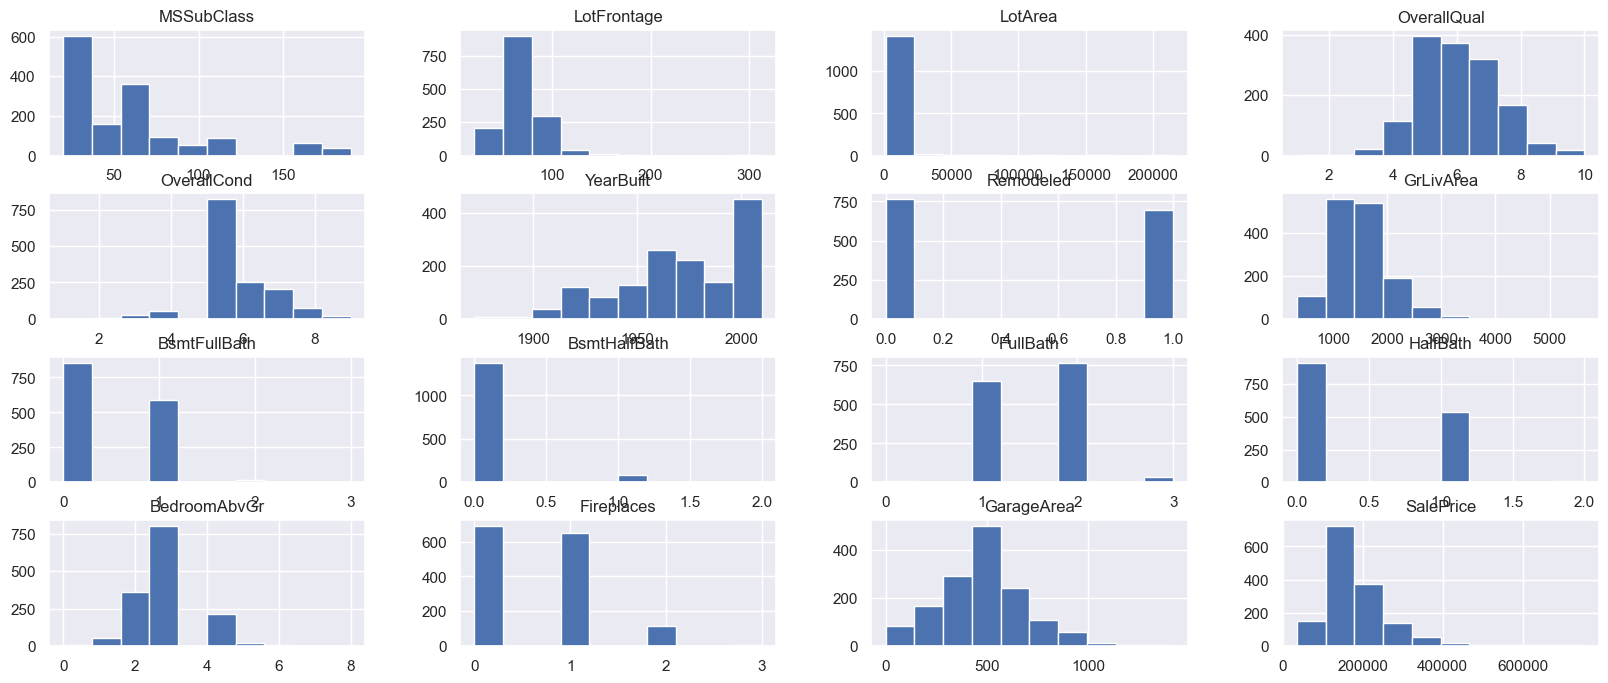

In [5]:
import seaborn as sns
sns.set()
dataset[int_cols].hist(figsize=(20,8))
plt.show()

## Feature Scaling

In [6]:
dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60.0,RL,65.0,8450.0,CollgCr,1Fam,2Story,7.0,5.0,2003.0,...,1710.0,1.0,0.0,2.0,1.0,3.0,0.0,548.0,Y,208500.0
1,20.0,RL,80.0,9600.0,Veenker,1Fam,1Story,6.0,8.0,1976.0,...,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,460.0,Y,181500.0
2,60.0,RL,68.0,11250.0,CollgCr,1Fam,2Story,7.0,5.0,2001.0,...,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,608.0,Y,223500.0
3,70.0,RL,60.0,9550.0,Crawfor,1Fam,2Story,7.0,5.0,1915.0,...,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,642.0,Y,140000.0
4,60.0,RL,84.0,14260.0,NoRidge,1Fam,2Story,8.0,5.0,2000.0,...,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,836.0,Y,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,RL,62.0,7917.0,Gilbert,1Fam,2Story,6.0,5.0,1999.0,...,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,460.0,Y,175000.0
1456,20.0,RL,85.0,13175.0,NWAmes,1Fam,1Story,6.0,6.0,1978.0,...,2073.0,1.0,0.0,2.0,0.0,3.0,2.0,500.0,Y,210000.0
1457,70.0,RL,66.0,9042.0,Crawfor,1Fam,2Story,7.0,9.0,1941.0,...,2340.0,0.0,0.0,2.0,0.0,4.0,2.0,252.0,Y,266500.0
1458,20.0,RL,68.0,9717.0,NAmes,1Fam,1Story,5.0,6.0,1950.0,...,1078.0,1.0,0.0,1.0,0.0,2.0,0.0,240.0,Y,142125.0


In [7]:
# Create the features and label
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1].values
y = y.reshape(len(y), 1)

In [8]:
sc_x = StandardScaler()
sc_y = StandardScaler()
# Standardise the numerical columns
X[int_cols[:-1]] = sc_x.fit_transform(X[int_cols[:-1]])
y = sc_y.fit_transform(y)
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive
0,0.073375,RL,-0.229372,-0.207142,CollgCr,1Fam,2Story,0.651479,-0.517200,1.050994,-0.954460,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.951226,0.351000,Y
1,-0.872563,RL,0.451936,-0.091886,Veenker,1Fam,1Story,-0.071836,2.179628,0.156734,-0.954460,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,0.600495,-0.060731,Y
2,0.073375,RL,-0.093110,0.073480,CollgCr,1Fam,2Story,0.651479,-0.517200,0.984752,1.047712,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,0.600495,0.631726,Y
3,0.309859,RL,-0.456474,-0.096897,Crawfor,1Fam,2Story,0.651479,-0.517200,-1.863632,1.047712,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,0.600495,0.790804,Y
4,0.073375,RL,0.633618,0.375148,NoRidge,1Fam,2Story,1.374795,-0.517200,0.951632,-0.954460,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,0.600495,1.698485,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,RL,-0.365633,-0.260560,Gilbert,1Fam,2Story,-0.071836,-0.517200,0.918511,1.047712,0.250402,-0.819964,-0.241061,0.789741,1.227585,0.163779,0.600495,-0.060731,Y
1456,-0.872563,RL,0.679039,0.266407,NWAmes,1Fam,1Story,-0.071836,0.381743,0.222975,1.047712,1.061367,1.107810,-0.241061,0.789741,-0.761621,0.163779,2.152216,0.126420,Y
1457,0.309859,RL,-0.183951,-0.147810,Crawfor,1Fam,2Story,0.651479,3.078570,-1.002492,1.047712,1.569647,-0.819964,-0.241061,0.789741,-0.761621,1.390023,2.152216,-1.033914,Y
1458,-0.872563,RL,-0.093110,-0.080160,NAmes,1Fam,1Story,-0.795151,0.381743,-0.704406,1.047712,-0.832788,1.107810,-0.241061,-1.026041,-0.761621,-1.062465,-0.951226,-1.090059,Y


## Encoding Categorical Variables

In [9]:
# Check the number of categories for each categorical column
print("Unique Categories for each categorical columns\n")
for col in dataset.select_dtypes(include=['object']).columns.to_list():
    print(col, '\n--------------')
    print(dataset[col].unique(), '\n')

Unique Categories for each categorical columns

MSZoning 
--------------
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Neighborhood 
--------------
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

BldgType 
--------------
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle 
--------------
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

PavedDrive 
--------------
['Y' 'N' 'P'] 



In [10]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5,6,19])],remainder='passthrough')
X = ct.fit_transform(X)
X

array([[ 0.        ,  0.        ,  0.        , ...,  0.16377912,
        -0.95122649,  0.35100032],
       [ 0.        ,  0.        ,  0.        , ...,  0.16377912,
         0.60049493, -0.06073101],
       [ 0.        ,  0.        ,  0.        , ...,  0.16377912,
         0.60049493,  0.63172623],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.39002276,
         2.15221636, -1.03391416],
       [ 0.        ,  0.        ,  0.        , ..., -1.06246453,
        -0.95122649, -1.09005935],
       [ 0.        ,  0.        ,  0.        , ...,  0.16377912,
        -0.95122649, -0.9216238 ]])

## Splitting the dataset into training and testing datasets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Use sklearn Pipeline to preprocess and fit a model

In [12]:
from sklearn.preprocessing import FunctionTransformer
from copy import deepcopy

X = data.iloc[:,:-1]
y = data.iloc[:,-1].values
# Fix missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X.select_dtypes(include=['int', 'float']))
int_cols = X.select_dtypes(include=['float', 'int']).columns.to_list()
X[int_cols] = imputer.transform(X[int_cols])
# OneHot encode the categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5,6,19])],remainder='passthrough')
X = ct.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Standardise the whole dataset
std_scaler = StandardScaler().fit(X_train)

def preprocessor(X):
    D = np.copy(X)
    D = std_scaler.transform(D)
    return D

In [13]:
len(X_test[0])

61

In [14]:
preprocessor_transformer = FunctionTransformer(preprocessor)
preprocessor_transformer

FunctionTransformer(func=<function preprocessor at 0x000001AC94235048>)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

p1 = Pipeline([('scaler', preprocessor_transformer),
              ('Linear Regression', LinearRegression())])
p1

Pipeline(steps=[('scaler',
                 FunctionTransformer(func=<function preprocessor at 0x000001AC94235048>)),
                ('Linear Regression', LinearRegression())])

In [16]:
from sklearn.metrics import mean_absolute_error

def fit_and_print(p, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    # Fit the transformer
    p.fit(X_train, y_train)
    # Predict the train and test outputs
    training_prediction = p.predict(X_train)
    test_prediction =p.predict(X_test)
    
    # Print the errors
    print("Training Error:     "+str(mean_absolute_error(training_prediction, y_train)))
    print("Test Error:         "+str(mean_absolute_error(test_prediction, y_test)))

In [17]:
fit_and_print(p1)

Training Error:     19612.705234115496
Test Error:         20056.787013477147


## Fit a KNN regressor

In [18]:
# Perform Grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor as KNR

# Create a KNN Regressor
knn = KNR()

# Define Hyperparameters to tune
param_grid = {
    'n_neighbors': [3,5,7,9,11]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                          scoring='neg_mean_squared_error', cv=5)
# Fit Grid Search to Data
grid_search.fit(X_train, y_train)
# Retrieve Best Parameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [19]:
print("best_params: ", best_params, "\nbest_estimator: ", best_estimator)

best_params:  {'n_neighbors': 7} 
best_estimator:  KNeighborsRegressor(n_neighbors=7)


In [20]:
p2 = Pipeline([('Scaler', preprocessor_transformer),
               ('KNN Regression', KNR(n_neighbors=9))])
fit_and_print(p2)

Training Error:     23518.734874429225
Test Error:         26095.699010654487


## Fit a RandomForestRegressor()

In [21]:
from sklearn.ensemble import RandomForestRegressor
# Create a random forest regressor
rf_regressor = RandomForestRegressor()

# Define Hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1,2,4,6,8,10],
#     'max_features': ['auto', 'sqrt'],
#     'bootstrap': [True, False]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5)
#Fit grid search data
grid_search.fit(X_train, y_train)
# Retrive best parameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("best_params: ", best_params, "\nbest_estimator: ", best_estimator)

best_params:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 150} 
best_estimator:  RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=150)


In [22]:
p3 = Pipeline([('Scaler', preprocessor_transformer),
               ('RFR Regression', RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=150))])
fit_and_print(p3)

Training Error:     8106.180156534265
Test Error:         18495.41643449427
